## Fetch Data Analyst Take-Home Exercise: Data Exploration, Insights, and Business Recommendations

Based on data received from Fetch.

https://fetch-hiring.s3.amazonaws.com/data-analyst/da_take_home/da_takehome_instructions.html

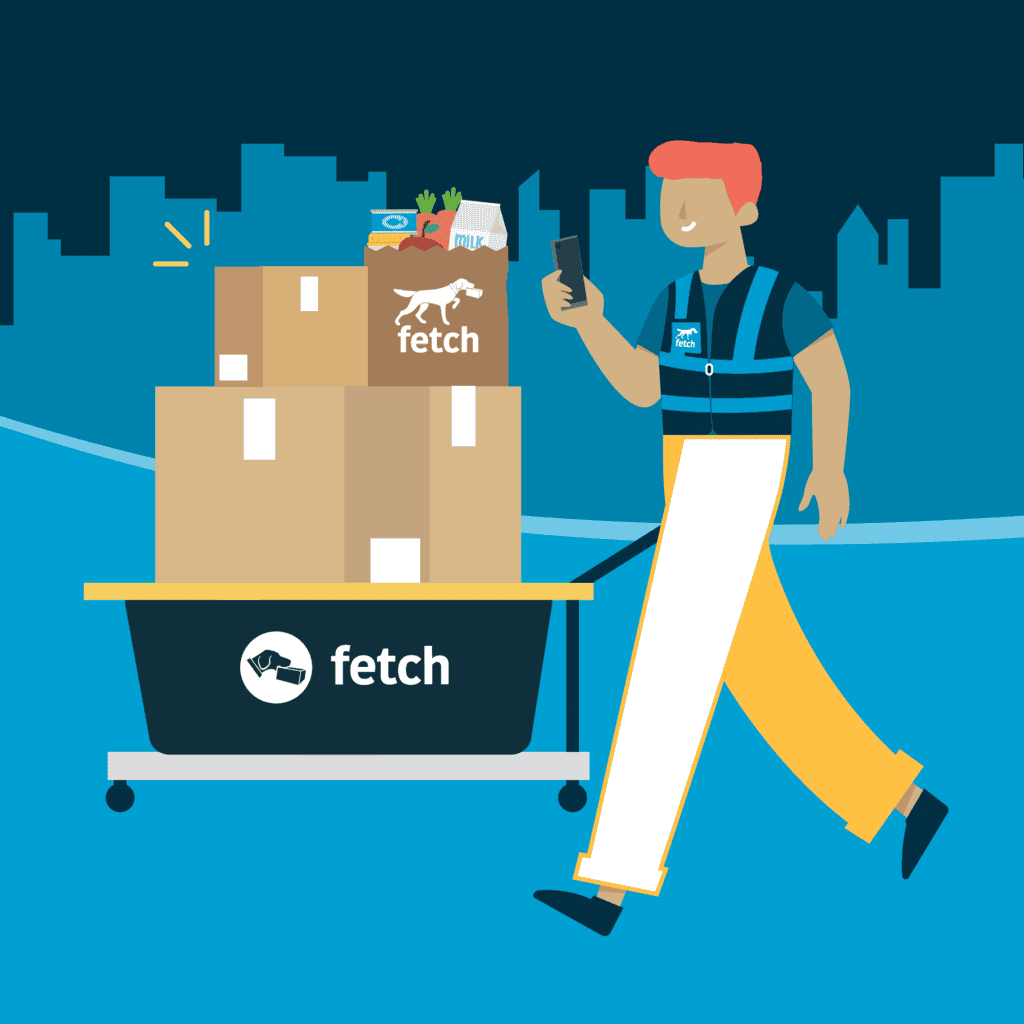

##############################################################################################################################

# Read Me!


Welcome to my solution for this technical assessment. I've broken this notebook into a few sections as according to the assignment.

The sections are as follows:

#### 1) Data Cleaning and Integrity Checks: 


Throughout this section I made sure to do integrity checks to ensure future data streams would be consistent and devoid of any issues. 

I also looked at data type and missing value issues to identify trends. The cleaning is done seperately for all 3 data tables - 
A) Cleaning the 'Transactions' table
B) Cleaning the 'Users' table
C) Cleaning the 'Products' table, 

and also I have exported merged data for future use - D) Exporting Merged data for future use

[Go to Data Cleaning and Integrity Checks](#1-data-cleaning-and-integrity-checks)


#### 2) Answers and Insights: 

As someone who loves understanding 'the flow' behind data, I found a few trends and recommendations (along with answering the questions) that I thought would be helpful!

[Go to Answers](#2-Answers)

#### 3) Answers and Insights: 
Summarizing the results



#### Install Packages and Import Data

In [1]:
%%capture 
# Capture basically helps us remove the output in the printed cells below.

!pip install pandas
!pip install matplotlib
!pip install jupysql

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##########################################################################################################################

<a id="1-data-cleaning-and-integrity-checks"></a>

# Part 1:  Data Cleaning and Integrity Checks

### Data Structure

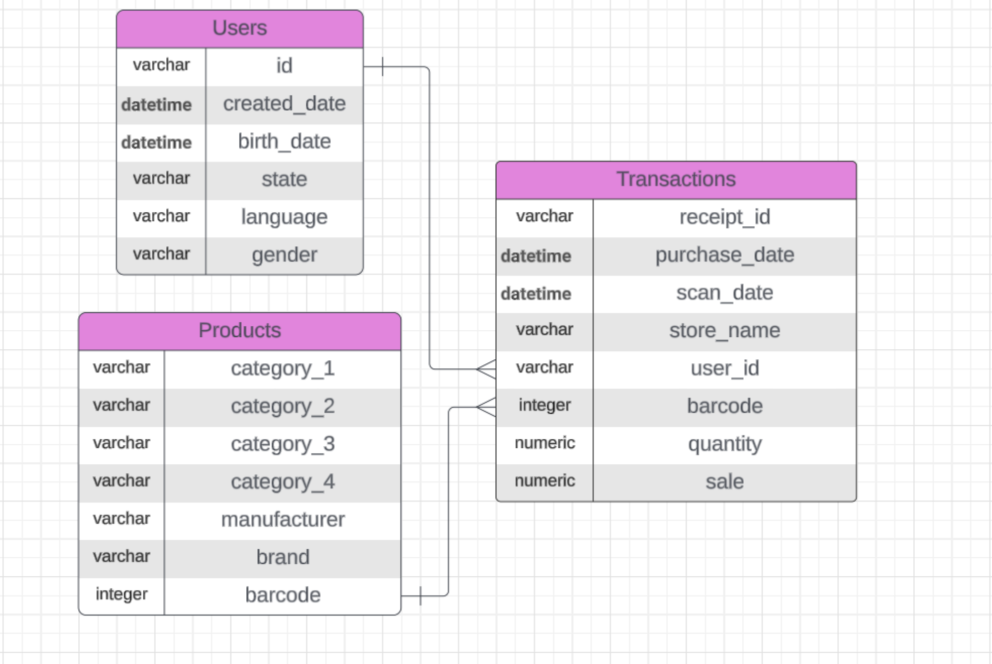

## A) Cleaning the 'Transactions' table

In [3]:
transactions = pd.read_csv('TRANSACTION_TAKEHOME.csv')

In [4]:
transactions.info()  # Here we try to check for missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RECEIPT_ID      50000 non-null  object 
 1   PURCHASE_DATE   50000 non-null  object 
 2   SCAN_DATE       50000 non-null  object 
 3   STORE_NAME      50000 non-null  object 
 4   USER_ID         50000 non-null  object 
 5   BARCODE         44238 non-null  float64
 6   FINAL_QUANTITY  50000 non-null  object 
 7   FINAL_SALE      50000 non-null  object 
dtypes: float64(1), object(7)
memory usage: 3.1+ MB


In [5]:
transactions.dtypes #Checking for data type consistencies.

RECEIPT_ID         object
PURCHASE_DATE      object
SCAN_DATE          object
STORE_NAME         object
USER_ID            object
BARCODE           float64
FINAL_QUANTITY     object
FINAL_SALE         object
dtype: object

In [6]:
transactions.head(10)  #The best way to analyze data is getting your hands dirty with the data head on.

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.00,
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,zero,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.00,
5,0002d8cd-1701-4cdd-a524-b70402e2dbc0,2024-06-24,2024-06-24 19:44:54.247 Z,WALMART,5dcc6c510040a012b8e76924,6.811314e+11,zero,1.46
6,000550b2-1480-4c07-950f-ff601f242152,2024-07-06,2024-07-06 19:27:48.586 Z,WALMART,5f850bc9cf9431165f3ac175,4.920091e+10,1.00,
7,00096c49-8b04-42f9-88ce-941c5e06c4a7,2024-08-19,2024-08-21 17:35:21.902 Z,TARGET,6144f4f1f3ef696919f54b5c,7.830007e+10,zero,3.59
8,000e1d35-15e5-46c6-b6b3-33653ed3d27e,2024-08-13,2024-08-13 18:21:07.931 Z,WALMART,61a6d926f998e47aad33db66,5.200001e+10,1.00,
9,0010d87d-1ad2-4e5e-9a25-cec736919d15,2024-08-04,2024-08-04 18:01:47.787 Z,ALDI,66686fc2e04f743a096ea808,NaN,zero,2.29


#### Data Quality Issues - Transactions table:

1) The SCAN_DATE column ends with the letter 'Z'. This could cause issues in data conversion and is probably due to data entry error.

2) There are multiple entries (duplicates) of the same receipt_id's and the respective following information which seems to        be the primary key of the transactions table.

3) The 'FINAL_QUANTITY' column has multiple types of data formats. For example '1' which should be numerical while we see          'zero' in other rows. There is clearly a mismatch in the datatypes.

4) The barcode column is missing for a portion of the receipts.

5) The information is also not populated in a way that is intuitive to understand.
    
(We see examples of this below)
   

In [7]:
receipt_counts = transactions["RECEIPT_ID"].value_counts()

# Map the count to a new column
transactions["RECEIPT_COUNT"] = transactions["RECEIPT_ID"].map(receipt_counts)

# Sort the DataFrame based on RECEIPT_COUNT in descending order
transactions_sorted = transactions.sort_values(by="RECEIPT_COUNT", ascending=False)

# Drop the temporary count column if you don't need it in the final output
transactions_sorted = transactions_sorted.drop(columns=["RECEIPT_COUNT"])

# Display the sorted DataFrame
transactions_sorted.head(10)

# For example when we look at the same receipt number below, barcode and other fields, we see different values in
# "FINAL_QUANTITY" and "FINAL_SALE"


,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
18641,bedac253-2256-461b-96af-267748e6cecf,2024-09-08,2024-09-08 20:00:42.348 Z,KROGER,614f7e8081627974a57c8a9e,1.111012e+10,zero,0.89
18638,bedac253-2256-461b-96af-267748e6cecf,2024-09-08,2024-09-08 20:00:42.348 Z,KROGER,614f7e8081627974a57c8a9e,1.111012e+10,1.00,
39705,bedac253-2256-461b-96af-267748e6cecf,2024-09-08,2024-09-08 20:00:42.348 Z,KROGER,614f7e8081627974a57c8a9e,1.111012e+10,1.00,0.89
39703,bedac253-2256-461b-96af-267748e6cecf,2024-09-08,2024-09-08 20:00:42.348 Z,KROGER,614f7e8081627974a57c8a9e,1.111012e+10,1.00,0.89
39706,bedac253-2256-461b-96af-267748e6cecf,2024-09-08,2024-09-08 20:00:42.348 Z,KROGER,614f7e8081627974a57c8a9e,1.111012e+10,1.00,0.89
39707,bedac253-2256-461b-96af-267748e6cecf,2024-09-08,2024-09-08 20:00:42.348 Z,KROGER,614f7e8081627974a57c8a9e,1.111012e+10,1.00,0.89
39708,bedac253-2256-461b-96af-267748e6cecf,2024-09-08,2024-09-08 20:00:42.348 Z,KROGER,614f7e8081627974a57c8a9e,1.111012e+10,1.00,0.89
18637,bedac253-2256-461b-96af-267748e6cecf,2024-09-08,2024-09-08 20:00:42.348 Z,KROGER,614f7e8081627974a57c8a9e,1.111012e+10,zero,0.89
39704,bedac253-2256-461b-96af-267748e6cecf,2024-09-08,2024-09-08 20:00:42.348 Z,KROGER,614f7e8081627974a57c8a9e,1.111012e+10,1.00,0.89
18642,bedac253-2256-461b-96af-267748e6cecf,2024-09-08,2024-09-08 20:00:42.348 Z,KROGER,614f7e8081627974a57c8a9e,1.111012e+10,1.00,


In [8]:
transactions.info() 
# We can see that Barcode is missing about 5762 values which can be an issue.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RECEIPT_ID      50000 non-null  object 
 1   PURCHASE_DATE   50000 non-null  object 
 2   SCAN_DATE       50000 non-null  object 
 3   STORE_NAME      50000 non-null  object 
 4   USER_ID         50000 non-null  object 
 5   BARCODE         44238 non-null  float64
 6   FINAL_QUANTITY  50000 non-null  object 
 7   FINAL_SALE      50000 non-null  object 
 8   RECEIPT_COUNT   50000 non-null  int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 3.4+ MB


In [9]:
# Let us now manipulate the data to ensure it is ready for processing and analysis.

# Transactions Table
transactions['PURCHASE_DATE'] = pd.to_datetime(transactions['PURCHASE_DATE'], errors='coerce').dt.strftime('%Y-%m-%d %H:%M:%S')
transactions['SCAN_DATE'] = pd.to_datetime(transactions['SCAN_DATE'], errors='coerce').dt.strftime('%Y-%m-%d %H:%M:%S')
transactions['SCAN_DATE'] = pd.to_datetime(transactions['SCAN_DATE'])
#transactions['BARCODE'] = transactions['BARCODE'].fillna(0).astype(str).str.replace('.0$', '', regex=True).astype(int) # Ensure leading zeros
transactions['BARCODE'] = transactions['BARCODE'].fillna(0).astype(str).str.replace('.0$', '', regex=True)

transactions['FINAL_QUANTITY'] = transactions['FINAL_QUANTITY'].replace({'zero': 0}).astype(float)
transactions['FINAL_SALE'] = pd.to_numeric(transactions['FINAL_SALE'], errors='coerce').fillna(0)  # Converting to float

In [10]:
transactions.dtypes

RECEIPT_ID                object
PURCHASE_DATE             object
SCAN_DATE         datetime64[ns]
STORE_NAME                object
USER_ID                   object
BARCODE                   object
FINAL_QUANTITY           float64
FINAL_SALE               float64
RECEIPT_COUNT              int64
dtype: object

In [11]:
transactions.head()

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE,RECEIPT_COUNT
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21 00:00:00,2024-08-21 14:19:06,WALMART,63b73a7f3d310dceeabd4758,15300014978,1.0,0.00,2
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20 00:00:00,2024-07-20 09:50:24,ALDI,62c08877baa38d1a1f6c211a,0,0.0,1.49,2
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18 00:00:00,2024-08-19 15:38:56,WALMART,60842f207ac8b7729e472020,78742229751,1.0,0.00,2
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18 00:00:00,2024-06-19 11:03:37,FOOD LION,63fcd7cea4f8442c3386b589,783399746536,0.0,3.49,2
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04 00:00:00,2024-07-05 15:56:43,RANDALLS,6193231ae9b3d75037b0f928,47900501183,1.0,0.00,2


In [12]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   RECEIPT_ID      50000 non-null  object        
 1   PURCHASE_DATE   50000 non-null  object        
 2   SCAN_DATE       50000 non-null  datetime64[ns]
 3   STORE_NAME      50000 non-null  object        
 4   USER_ID         50000 non-null  object        
 5   BARCODE         50000 non-null  object        
 6   FINAL_QUANTITY  50000 non-null  float64       
 7   FINAL_SALE      50000 non-null  float64       
 8   RECEIPT_COUNT   50000 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 3.4+ MB


In [13]:
#My Transactions table has duplicate entries
#Only retain rows with FINAL_SALE!=0 OR FINAL_QUANTITY!=0
transactions = transactions[~((transactions['FINAL_QUANTITY'] == 0.0) | (transactions['FINAL_SALE'] == 0.00))] # adding an OR condition because we only want to see rows where we see both a quantity and a final sale amount.
transactions = transactions.drop_duplicates() #There are some duplicates even after removal


In [14]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24538 entries, 25000 to 49999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   RECEIPT_ID      24538 non-null  object        
 1   PURCHASE_DATE   24538 non-null  object        
 2   SCAN_DATE       24538 non-null  datetime64[ns]
 3   STORE_NAME      24538 non-null  object        
 4   USER_ID         24538 non-null  object        
 5   BARCODE         24538 non-null  object        
 6   FINAL_QUANTITY  24538 non-null  float64       
 7   FINAL_SALE      24538 non-null  float64       
 8   RECEIPT_COUNT   24538 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 1.9+ MB


In [15]:
barcode_transactions = transactions[transactions['BARCODE']!=0]

In [16]:
barcode_transactions.shape

barcode_transactions.drop(['RECEIPT_COUNT'],axis = 1, inplace=True) #Remember we made this temp column before!

In [17]:
barcode_transactions

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
25000,7b3ec72d-9d30-40b8-b185-0bfb638942a9,2024-08-20 00:00:00,2024-08-20 11:17:29,DOLLAR GENERAL STORE,60fc1e6deb7585430ff52ee7,745527114884,1.0,1.65
25001,04869b68-29e3-4e8d-9bdb-950046fc3473,2024-08-05 00:00:00,2024-08-09 16:06:00,DOLLAR GENERAL STORE,654cf234a225ea102b81072e,745527114884,1.0,1.65
25002,f1a96308-24a5-46a8-8d8c-285cf9dce1ba,2024-09-03 00:00:00,2024-09-03 11:28:25,WALMART,63c1cb6d3d310dceeac55487,37000828761,1.0,28.22
25003,7ee1798e-fd2e-4278-838b-f417fdcafe08,2024-08-30 00:00:00,2024-09-04 12:53:31,DOLLAR GENERAL STORE,65c29b137050d0a6206cd24f,12000504051,1.0,5.25
25004,21feab39-49f2-42e9-ae69-10371e2fc0a9,2024-08-23 00:00:00,2024-08-27 10:45:00,TARGET,61a58ac49c135b462ccddd1c,24000393429,1.0,2.59
...,...,...,...,...,...,...,...,...
49995,b5cd61a9-8033-4913-a5c4-fb3f65e3a321,2024-08-21 00:00:00,2024-08-31 14:13:08,TARGET,6154bcf098f885648de2f299,85239110669,2.0,1.18
49996,e1b2f634-c9ad-4152-b662-4b22efc25862,2024-08-11 00:00:00,2024-08-11 18:15:56,STOP & SHOP,60aa809f188b926b2244c974,46100400555,1.0,2.00
49997,b07ef8dd-e444-40a2-819b-f74a3e5f1ae7,2024-07-11 00:00:00,2024-07-11 08:03:25,WALMART,60bd26e83dc3b13a15c5f4e7,646630019670,1.0,20.96
49998,42475141-bef4-4df2-aa37-72577e2512bb,2024-06-18 00:00:00,2024-06-18 19:57:32,MARKET BASKET,6169912fac47744405af62b7,41800501519,1.0,3.00


In [18]:
transactions = barcode_transactions

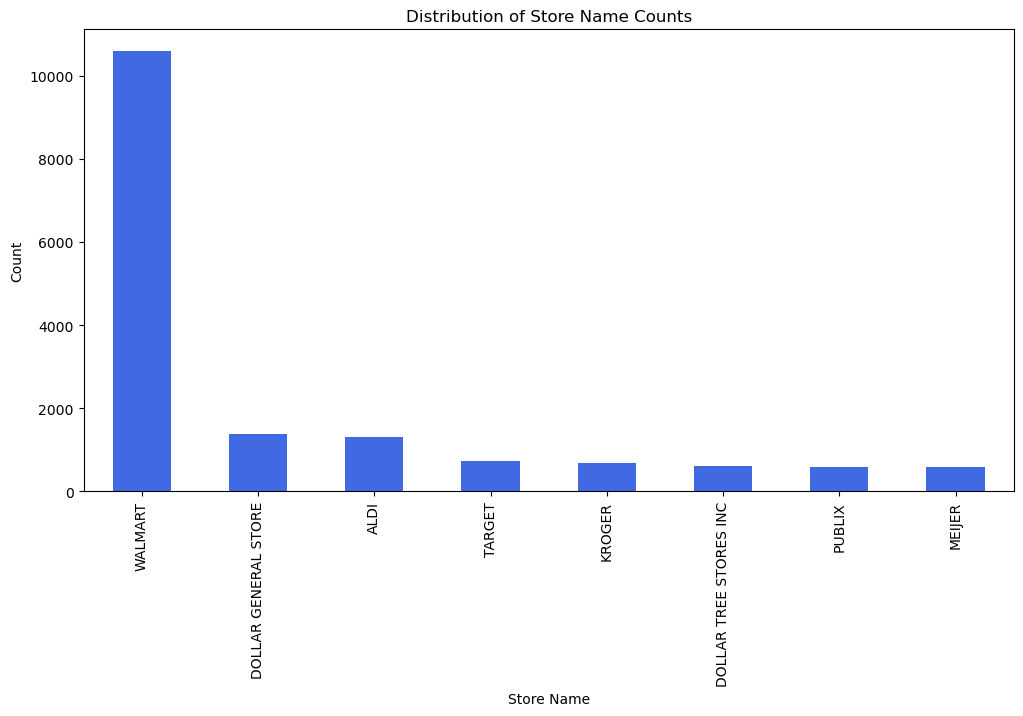

In [19]:
# Plotting the distribution of STORE_NAME counts
plt.figure(figsize=(12, 6))
barcode_transactions["STORE_NAME"].value_counts().head(8).plot(kind="bar", color='royalblue')
plt.title("Distribution of Store Name Counts")
plt.xlabel("Store Name")
plt.ylabel("Count")
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()

##### Takeaway: We see Walmart as a huge part of what our audience is using. 

We can come up with strategic partnerships with walmart, to give the customers at Fetch better rewards.

In [20]:
# #Percentage of entries without bar code transactions
# import numpy as np
# percentage_missing = np.round((1 - barcode_transactions.shape[0] / transactions.shape[0]) * 100, 2)
# percentage_missing_barcode = str(percentage_missing) + "%"
# percentage_missing_barcode

## B) Cleaning the 'Users' table

In [21]:
users = pd.read_csv('USER_TAKEHOME.csv')

In [22]:
users.dtypes

ID              object
CREATED_DATE    object
BIRTH_DATE      object
STATE           object
LANGUAGE        object
GENDER          object
dtype: object

In [23]:
users.head(10)

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54.000 Z,2000-08-11 00:00:00.000 Z,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55.000 Z,2001-09-24 04:00:00.000 Z,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18.000 Z,1994-10-28 00:00:00.000 Z,FL,es-419,female
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22.000 Z,NaN,NC,en,NaN
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50.000 Z,1972-03-19 00:00:00.000 Z,PA,en,female
5,5fe2b6f3ad416a1265c4ab68,2020-12-23 03:18:11.000 Z,1999-10-27 04:00:00.000 Z,NY,en,female
6,651210546816bb4d035b1ead,2023-09-25 22:57:24.000 Z,1983-09-25 22:57:25.000 Z,FL,es-419,male
7,642831ea3d4434e63c1936fd,2023-04-01 13:30:18.000 Z,1970-02-16 05:00:00.000 Z,IN,en,female
8,63a4c9a1b5f32149b9d82f9e,2022-12-22 21:18:25.000 Z,1982-12-22 05:00:00.000 Z,NC,en,female
9,63654b21d02459d8a57a2e2c,2022-11-04 17:25:53.000 Z,1992-05-03 04:00:00.000 Z,NY,en,non_binary


In [24]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ID            100000 non-null  object
 1   CREATED_DATE  100000 non-null  object
 2   BIRTH_DATE    96325 non-null   object
 3   STATE         95188 non-null   object
 4   LANGUAGE      69492 non-null   object
 5   GENDER        94108 non-null   object
dtypes: object(6)
memory usage: 4.6+ MB


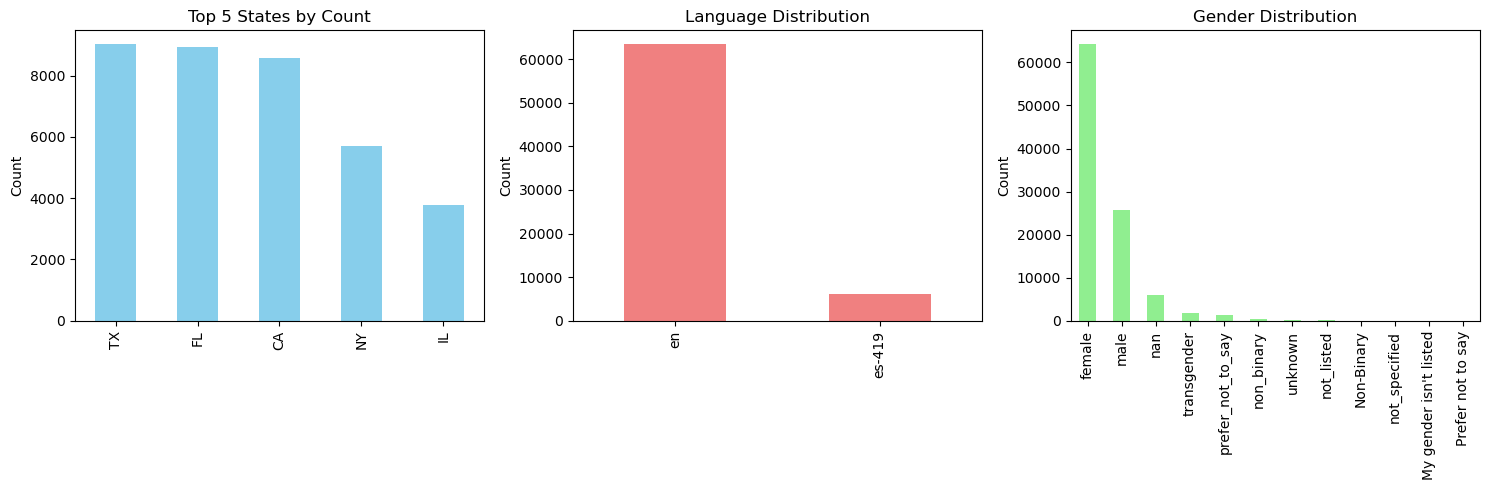

In [25]:
# Let us explore the data a little and get our hands even more dirtier! (In a good way :D)

# Plot distributions
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# State distribution (Top 5 states)
users["STATE"].value_counts().head(5).plot(kind="bar", ax=axes[0], title="Top 5 States by Count", color='skyblue')
axes[0].set_ylabel("Count")

# Language distribution
users["LANGUAGE"].value_counts().plot(kind="bar", ax=axes[1], title="Language Distribution", color='lightcoral')
axes[1].set_ylabel("Count")

# Gender distribution
users["GENDER"].value_counts(dropna=False).plot(kind="bar", ax=axes[2], title="Gender Distribution", color='lightgreen')
axes[2].set_ylabel("Count")

# Show plots
plt.tight_layout()
plt.show()


##### Takeaway: EDA to understand our audience!

- We see a lot of them come from Texas, Florida and California. This makes sense as these are populous states.

- We see the language distribution skew towards english speaking audiences but potential ideas include catering to the spanish speakers as well.

- We see a majority of our audiences as male and females. 


#### Data Quality Issues - Users table

1) Missing 'BIRTH_DATE' values for users.

2) Missing 'LANGUAGE' values for users.

3) Missing 'GENDER' values for users.

4) Similar to the 'TRANSACTIONS' table there is an additional 'Z' at the end of the 'CREATED_DATE'.

5) We see discrepanicies with some categories. For example 'Non-Binary' and 'non_binary' could be bucketed in the same category.



In [26]:
# Let us clean up this data as well.
# Convert datetime columns to the correct format
users['CREATED_DATE'] = pd.to_datetime(users['CREATED_DATE'], errors='coerce').dt.strftime('%Y-%m-%d %H:%M:%S')
users['CREATED_DATE'] = pd.to_datetime(users['CREATED_DATE'])
users['BIRTH_DATE'] = pd.to_datetime(users['BIRTH_DATE'], errors='coerce').dt.strftime('%Y-%m-%d %H:%M:%S')
users['BIRTH_DATE'] = pd.to_datetime(users['BIRTH_DATE'])
users = users.drop_duplicates()

## C) Cleaning the 'Products' table

In [27]:
products = pd.read_csv('PRODUCTS_TAKEHOME.csv')
products

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,7.964944e+11
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,2.327801e+10
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,4.618178e+11
3,Health & Wellness,Oral Care,Toothpaste,NaN,COLGATE-PALMOLIVE,COLGATE,3.500047e+10
4,Health & Wellness,Medicines & Treatments,Essential Oils,NaN,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,8.068109e+11
...,...,...,...,...,...,...,...
845547,Health & Wellness,Topical Muscle & Joint Relief Treatments,Braces & Wraps,NaN,NaN,NaN,7.223016e+11
845548,Snacks,Cookies,NaN,NaN,"TREEHOUSE FOODS, INC.",LOFTHOUSE,4.182082e+10
845549,Snacks,Candy,Confection Candy,NaN,HARIBO GMBH & CO KG,HARIBO,1.001672e+11
845550,Snacks,Nuts & Seeds,Hazelnuts,NaN,DOUBLE-COLA CO,JUMBO,7.539076e+10


### Data Quality Issues - Products table


1) Missing Barcode information

2) Missing information regarding the manufacturer, brand and the categories. This is in varied ways.

3) There are different bar codes for the same products.

4) A recommendation would be to add product name's as an extra column. This would help give the layout of this table more context.

In [28]:
products.dtypes

CATEGORY_1       object
CATEGORY_2       object
CATEGORY_3       object
CATEGORY_4       object
MANUFACTURER     object
BRAND            object
BARCODE         float64
dtype: object

In [29]:
# Let us massage this data as well to clean it up.

products['BARCODE'] = products['BARCODE'].fillna(0).astype(str).str.replace('.0$', '', regex=True) # Ensure leading zeros
products = products.drop_duplicates() # We see multiple rows of the same data so this is good

In [30]:
products.head()

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,796494407820
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,23278011028
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,461817824225
3,Health & Wellness,Oral Care,Toothpaste,NaN,COLGATE-PALMOLIVE,COLGATE,35000466815
4,Health & Wellness,Medicines & Treatments,Essential Oils,NaN,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,806810850459


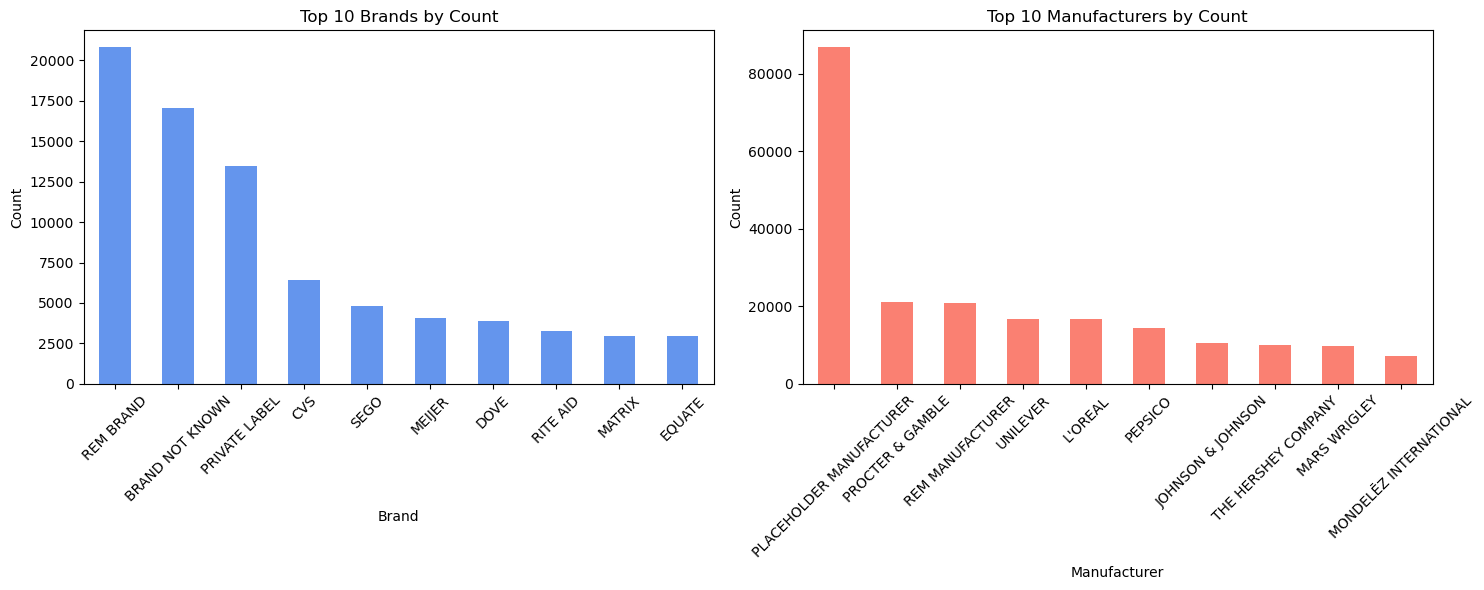

In [31]:
#Now let us visualize to identify potential issues.

# Plot distributions of top brands and manufacturers
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Top 10 Brands
products["BRAND"].value_counts().head(10).plot(kind="bar", ax=axes[0], color='cornflowerblue')
axes[0].set_title("Top 10 Brands by Count")
axes[0].set_xlabel("Brand")
axes[0].set_ylabel("Count")
axes[0].tick_params(axis='x', rotation=45)

# Top 10 Manufacturers
products["MANUFACTURER"].value_counts().head(10).plot(kind="bar", ax=axes[1], color='salmon')
axes[1].set_title("Top 10 Manufacturers by Count")
axes[1].set_xlabel("Manufacturer")
axes[1].set_ylabel("Count")
axes[1].tick_params(axis='x', rotation=45)

# Show plots
plt.tight_layout()
plt.show()

#### Takeaway: 
- We notice that a large amount of manufacturers are still blank and that there is also a dummy variable 'PLACEHOLDER MANUFACTURER'. 
- This implies that there is potential to standardize how information is entered into the systems at fetch.

## D) Exporting Merged data for future use.

In [32]:
transactions.to_csv('transactions_cleaned.csv', index=False) 
users.to_csv('users_cleaned.csv', index=False) 
products.to_csv('products_cleaned.csv', index=False) 

In [33]:
# Merge transactions with users on USER_ID = ID
merged_data = barcode_transactions.merge(products, on='BARCODE') #try - left

In [34]:
merged_data.shape

(10551285, 14)

In [35]:
# Merge the resulting dataset with products on BARCODE
merged_data = merged_data.merge(users, left_on='USER_ID', right_on='ID') #try - left

In [36]:
merged_data.shape

(43720, 20)

In [37]:
merged_data.to_csv('merged_data.csv', index=False)
merged_data

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,b94eb3c1-88ea-4785-be4c-f54b6679b816,2024-07-15 00:00:00,2024-07-16 12:02:24,CVS,61730bba65abe727fff3fcf7,0,1.0,9.11,Health & Wellness,NaN,NaN,NaN,CHURCH & DWIGHT,REPHRESH,61730bba65abe727fff3fcf7,2021-10-22 19:06:34,1954-07-12 00:00:00,MO,en,female
1,b94eb3c1-88ea-4785-be4c-f54b6679b816,2024-07-15 00:00:00,2024-07-16 12:02:24,CVS,61730bba65abe727fff3fcf7,0,1.0,9.11,Snacks,Jerky & Dried Meat,NaN,NaN,CONAGRA,SLIM JIM,61730bba65abe727fff3fcf7,2021-10-22 19:06:34,1954-07-12 00:00:00,MO,en,female
2,b94eb3c1-88ea-4785-be4c-f54b6679b816,2024-07-15 00:00:00,2024-07-16 12:02:24,CVS,61730bba65abe727fff3fcf7,0,1.0,9.11,Snacks,Crackers,Wheat Crackers,NaN,KELLANOVA,CARR'S,61730bba65abe727fff3fcf7,2021-10-22 19:06:34,1954-07-12 00:00:00,MO,en,female
3,b94eb3c1-88ea-4785-be4c-f54b6679b816,2024-07-15 00:00:00,2024-07-16 12:02:24,CVS,61730bba65abe727fff3fcf7,0,1.0,9.11,Health & Wellness,Hair Care,Shampoo,NaN,UNILEVER,APOTHECARE ESSENTIALS,61730bba65abe727fff3fcf7,2021-10-22 19:06:34,1954-07-12 00:00:00,MO,en,female
4,b94eb3c1-88ea-4785-be4c-f54b6679b816,2024-07-15 00:00:00,2024-07-16 12:02:24,CVS,61730bba65abe727fff3fcf7,0,1.0,9.11,Health & Wellness,Eye Care,Contact Lens Solution,NaN,BAUSCH + LOMB CORPORATION,BAUSCH + LOMB,61730bba65abe727fff3fcf7,2021-10-22 19:06:34,1954-07-12 00:00:00,MO,en,female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43715,ea84bde0-b0f3-4d85-b19b-6c141986b799,2024-08-17 00:00:00,2024-08-17 10:04:37,CVS,643059f0838dd2651fb27f50,50428438169,1.0,72.00,Health & Wellness,Medical Supplies & Equipment,NaN,NaN,CVS,CVS,643059f0838dd2651fb27f50,2023-04-07 17:59:12,1954-10-02 00:00:00,PA,en,male
43716,3c6b21b7-4f9e-4316-98e5-8842c5491871,2024-08-30 00:00:00,2024-09-03 12:35:17,TARGET,5fd4fb485f410d44bae3a776,22400643366,2.0,14.58,Health & Wellness,Hair Care,Hair Styling Products,NaN,UNILEVER,TRESEMMÉ,5fd4fb485f410d44bae3a776,2020-12-12 17:18:00,1979-01-23 00:00:00,CA,es-419,female
43717,7297a22f-4a0a-4377-9eae-c8fb3e35ea4c,2024-08-25 00:00:00,2024-08-25 15:42:48,WALMART,6615dab878ee6750bbc350ea,817719021673,1.0,6.98,Snacks,Snack Bars,Fruit & Nut Bars,NaN,NaN,NaN,6615dab878ee6750bbc350ea,2024-04-10 00:18:00,1984-04-28 00:00:00,VA,en,female
43718,d80f7f61-d98f-46d7-be8a-0969971e2b7c,2024-08-16 00:00:00,2024-08-17 08:55:14,HY-VEE,5e6d0beb01ecdd13986852e8,30772112526,1.0,8.97,Health & Wellness,Oral Care,Toothpaste,NaN,PROCTER & GAMBLE,CREST,5e6d0beb01ecdd13986852e8,2020-03-14 16:53:00,1960-05-12 00:00:00,IA,en,male


In [38]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43720 entries, 0 to 43719
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   RECEIPT_ID      43720 non-null  object        
 1   PURCHASE_DATE   43720 non-null  object        
 2   SCAN_DATE       43720 non-null  datetime64[ns]
 3   STORE_NAME      43720 non-null  object        
 4   USER_ID         43720 non-null  object        
 5   BARCODE         43720 non-null  object        
 6   FINAL_QUANTITY  43720 non-null  float64       
 7   FINAL_SALE      43720 non-null  float64       
 8   CATEGORY_1      43720 non-null  object        
 9   CATEGORY_2      35349 non-null  object        
 10  CATEGORY_3      23375 non-null  object        
 11  CATEGORY_4      2416 non-null   object        
 12  MANUFACTURER    41000 non-null  object        
 13  BRAND           41000 non-null  object        
 14  ID              43720 non-null  object        
 15  CR

In [39]:
# Checking nulls percentage
# np.round(merged_data.isnull().sum() * 100 / len(merged_data),2)

<a id="2-Answers"></a>

##########################################################################################################################

##########################################################################################################################

# Part 2:  Answers and Insights

### Before looking at the questions let us make a few assumptions and points to keep in mind:


- The provided datasets contain all necessary information without critical missing values that could heavily impact analysis.
Any missing data can be reasonably ignored based on overall trends.


- We also see issues with the structure of the data files given to us. We are assuming that the steps followed for data cleaning (removing duplicate rows and rows with incoherent information) as a viable way of approaching this problem statement.

In a real world scenario, a quick meeting would help with clarifying some of these!

I will be answering the following 3 Questions in the following analysis
1. What are the top 5 brands by sales among users that have had their account for at least six months? (Closed)
2. What is the percentage of sales in the Health & Wellness category by generation? (Closed)
3. At what percent has Fetch grown year over year?



### Let us get things ready!

In [40]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24538 entries, 25000 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   RECEIPT_ID      24538 non-null  object        
 1   PURCHASE_DATE   24538 non-null  object        
 2   SCAN_DATE       24538 non-null  datetime64[ns]
 3   STORE_NAME      24538 non-null  object        
 4   USER_ID         24538 non-null  object        
 5   BARCODE         24538 non-null  object        
 6   FINAL_QUANTITY  24538 non-null  float64       
 7   FINAL_SALE      24538 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 1.7+ MB


In [41]:
# Let us get the SQL code ready
# We use the library jupysql to help us write sql code in jupyter notebooks

################################
#### do not alter this code ####
################################


%load_ext sql
%sql sqlite://

%sql --persist transactions
%sql --persist users
%sql --persist products

Connecting to 'sqlite://'

Running query in 'sqlite://'

Success! Persisted transactions to the database.

Running query in 'sqlite://'

Success! Persisted users to the database.

Running query in 'sqlite://'

Success! Persisted products to the database.

## Closed Ended

### Ans 1: What are the top 5 brands by sales among users that have had their account for at least six months?

In [42]:
%%sql

-- Doing some slight data checks to look for duplicate users 

SELECT COUNT(U.ID)
FROM Users U;

Running query in 'sqlite://'

COUNT(U.ID)
100000


In [43]:
%%sql


-- We can see there are all distinct users

SELECT COUNT( DISTINCT U.ID)
FROM Users U;



Running query in 'sqlite://'

COUNT( DISTINCT U.ID)
100000


### To determine the top 5 brands by total sales among users who created their accounts at least 6 months ago, we will use a structured filtering and aggregation approach (My pseudo code is below) :

#### 1) Filter Users Active for 6+ Months
     Use DATE('now', '-6 months') to find users who signed up at least 6 months ago.
     
     
#### 2)Filter Transactions for Eligible Users
     Join Transactions with Eligible_Users to retain only purchases from long-term users.
     
#### 3)Aggregate Sales by Brand
     Use SUM(FINAL_SALE) to calculate total sales per brand.
     
     Exclude products with NULL brands to ensure meaningful results.
     
#### 4) Rank and Select the Top 5 Brands
     Sort brands by total sales in descending order and apply LIMIT 5.

In [44]:
%%sql

-- Step 1: Identify users who created their accounts at least 6 months ago
    
-- Let use some cool CTE's
WITH Eligible_Users AS (
    SELECT id
    FROM Users
    WHERE CREATED_DATE <= DATE('now', '-6 months')  -- SQLite way of subtracting 6 months from the current date
),

-- Step 2: Filter transactions to include only those made by eligible users
Filtered_Transactions AS (
    SELECT t.*
    FROM Transactions t
    JOIN Eligible_Users eu ON t.USER_ID = eu.id
),

-- Step 3: Aggregate sales data by brand
Sales_By_Brand AS (
    SELECT 
        p.brand, 
        SUM(t.FINAL_SALE) AS total_sales  -- Summing up the total sales per brand
    FROM Filtered_Transactions t
    JOIN Products p ON t.BARCODE = p.BARCODE  -- Joining with Products table to get brand info
    WHERE p.brand IS NOT NULL  -- Exclude products with no brand
    GROUP BY p.brand  -- Grouping by brand to get total sales per brand
)

-- Step 4: Retrieve the top 5 brands with the highest total sales
SELECT brand, total_sales
FROM Sales_By_Brand
ORDER BY total_sales DESC  -- Sorting in descending order to get the highest sales first
LIMIT 5;  -- Return only the top 5 brands


Running query in 'sqlite://'

brand,total_sales
ANNIE'S HOMEGROWN GROCERY,1481.2800000000009
DOVE,1450.4700000000007
BAREFOOT,1419.5600000000006
ORIBE,1296.1199999999997
AVEENO,1234.3999999999992


#### Takeaway: 
- We see that Annie's homegrown grocery takes the first spot followed by Dove and Barefoot.
- We can also further bucket the top 3 as they have the highest sales.

### Ans 2: What are the top 5 brands by receipts scanned among users 21 and over?

### To determine the top 5 brands by receipts scanned among users 21 and over, we will filter and aggregate data efficiently:


     1) Filter Users Aged 21+ using strftime('%Y', 'now') - strftime('%Y', BIRTH_DATE).

     2) Filter Transactions to include only those from eligible users.

     3) Count Unique Receipts per Brand using COUNT(DISTINCT RECEIPT_ID) to avoid overcounting multiple items from the same receipt.

     4) Rank and Select the Top 5 Brands by sorting receipt count in descending order and applying LIMIT 5.


### Let us reuse some code from before!

In [45]:
%%sql

-- Step 1: Identify users who are 21 or older
WITH Eligible_Users AS (
    SELECT id
    FROM Users
    WHERE strftime('%Y', 'now') - strftime('%Y', BIRTH_DATE) >= 21
),

-- Step 2: Filter transactions for eligible users   -- we did this for the last q too!
Filtered_Transactions AS (
    SELECT t.*
    FROM Transactions t
    JOIN Eligible_Users eu ON t.USER_ID = eu.id
),

-- Step 3: Count receipts scanned per brand
Receipts_By_Brand AS (
    SELECT 
        p.brand, 
        COUNT(DISTINCT t.RECEIPT_ID) AS receipt_count  -- Count unique receipts per brand
    FROM Filtered_Transactions t
    JOIN Products p ON t.BARCODE = p.BARCODE
    WHERE p.brand IS NOT NULL
    GROUP BY p.brand
)

-- Step 4: Select top 5 brands by receipt count
SELECT brand, receipt_count
FROM Receipts_By_Brand
ORDER BY receipt_count DESC
LIMIT 5;


Running query in 'sqlite://'

brand,receipt_count
DOVE,14
NERDS CANDY,14
COCA-COLA,13
HERSHEY'S,13
SOUR PATCH KIDS,13


#### Takeaway: 
- Here we see Dove, followed by Nerds and Coca-cola as something 21 and over have on their receipts. Talk about a sweet tooth.

## Open Ended

### Ans 3: At what percent has Fetch grown year over year?

### Assumptions:

### User Growth Basis:

Growth is measured by the number of new users created each year (CREATED_DATE in Users).
YoY growth is calculated a the percentage increase or decrease in users from the previous year



### Data Considerations:

Only users 21 years or older are considered.
The latest year (2024) may be incomplete if data collection is ongoing.
We assume no user churn—only new user acquisition is analyzed.

In [46]:
%%sql

-- Step 1: Count users who joined Fetch each year
WITH User_Growth AS (
    SELECT 
        strftime('%Y', CREATED_DATE) AS year, 
        COUNT(id) AS user_count
    FROM Users
    GROUP BY year
),

-- Step 2: Calculate year-over-year growth
YoY_Growth AS (
    SELECT 
        u1.year AS current_year,
        u1.user_count AS current_users,
        u2.user_count AS previous_users,
        ROUND(
            ((u1.user_count - u2.user_count) * 100.0) / u2.user_count, 2
        ) AS growth_percent
    FROM User_Growth u1
    LEFT JOIN User_Growth u2 
    ON u1.year = strftime('%Y', DATE(u2.year || '-01-01', '+1 year'))
    WHERE u2.user_count IS NOT NULL -- Exclude the first year since it has no previous comparison
)

-- Step 3: Display year-over-year growth results
SELECT * FROM YoY_Growth
ORDER BY current_year DESC;


Running query in 'sqlite://'

current_year,current_users,previous_users,growth_percent
2024,11631,15464,-24.79
2023,15464,26807,-42.31
2022,26807,19159,39.92
2021,19159,16883,13.48
2020,16883,7093,138.02
2019,7093,2168,227.17
2018,2168,644,236.65
2017,644,70,820.0
2016,70,51,37.25
2015,51,30,70.0


#### Takeaway: 
- Fetch has shown the positive growth rate from 2015 to 2022, with the best performance in 2017
- Growth slowed in 2021, post-COVID scenario and declined in 2023-2024.
- To tackle this decline in the growth, Fetch should assess on two scenarios, 
    - Re-engage existing users through retention programs
    - Acquire new users through more strategic partnerships

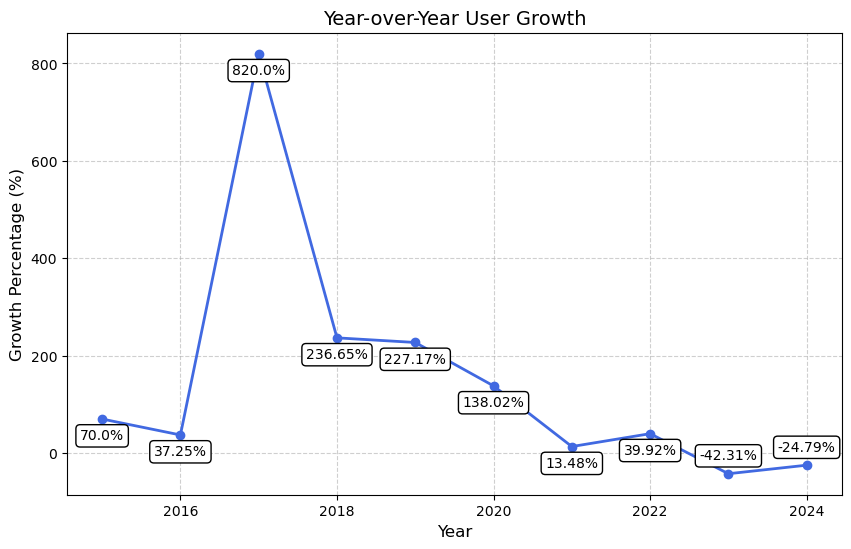

In [47]:
## Let us visualize this as well to show stakeholders things in a more visual way.

# Define the data
data = {
    "current_year": [2024, 2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015],
    "growth_percent": [-24.79, -42.31, 39.92, 13.48, 138.02, 227.17, 236.65, 820.0, 37.25, 70.0]
}

# Convert data to DataFrame
df_yoy = pd.DataFrame(data)

# Ensure data is sorted by year (ascending order)
df_yoy = df_yoy.sort_values(by="current_year")

# Convert DataFrame columns to NumPy arrays
years = df_yoy["current_year"].to_numpy()
growth_rates = df_yoy["growth_percent"].to_numpy()

# Plot Year-over-Year Growth
plt.figure(figsize=(10, 6))
plt.plot(years, growth_rates, marker="o", linestyle="-", color="royalblue", linewidth=2)

# Label each point on the graph with better spacing
for i, txt in enumerate(growth_rates):
    offset = -15 if txt > 0 else 10  # Adjust label position based on value direction
    plt.annotate(f"{txt}%", (years[i], growth_rates[i]), 
                 textcoords="offset points", xytext=(0, offset), ha="center", fontsize=10, 
                 bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# Titles and Labels
plt.title("Year-over-Year User Growth", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Growth Percentage (%)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)

# Show the plot
plt.show()




##########################################################################################################################

# Slack/ Email Message


Construct an email or slack message that is understandable to a product or business leader who is not familiar with your day-to-day work. Summarize the results of your investigation. Include:

- Key data quality issues and outstanding questions about the data
- One interesting trend in the data
        Use a finding from part 2 or come up with a new insight
- Request for action: explain what additional help, info, etc. you need to make sense of the data and resolve any outstanding issue

### Subject: Data Quality Findings, Growth Trends, and Next Steps


Hi Leader,

I’ve been analyzing our transaction, user, and product data, and there are some key data quality issues that might impact decision-making. Additionally, I’ve identified some interesting trends in user growth and brand performance that could inform our business strategy.

#### Data Quality Issues:

- Transactions Table: Data inconsistencies such as SCAN_DATE ending in 'Z', duplicate receipt_ids, mixed data formats in FINAL_QUANTITY, and missing BARCODE values.
- Users Table: Missing values in BIRTH_DATE, LANGUAGE, and GENDER. Additionally, we see inconsistencies in category naming (e.g., Non-Binary vs. non_binary).
- Products Table: Large gaps in manufacturer and category data, inconsistent BARCODE assignments, and a placeholder manufacturer field, suggesting a need for standardization.


#### Interesting Trend Identified:

- Declining Year-over-Year Growth: Fetch saw a peak growth of 820% in 2017 but has been declining, with a 42% drop in 2023 and 24% decline in 2024 (PFA).
- Brand Performance: Among users active for at least six months, the top brands by sales are Annie’s Homegrown Grocery, Dove, and Barefoot.
- Retailer Engagement: We see Walmart as a major retailer used by our audience. There is an opportunity to explore strategic partnerships with Walmart to provide better rewards and drive higher engagement.
- Strategic Implications: The declining growth trend suggests potential market saturation, engagement drop-off, or increased competition. Re-engaging the existing user base and acquiring new users through strategic partnerships (e.g., Walmart) could help reverse this trend.

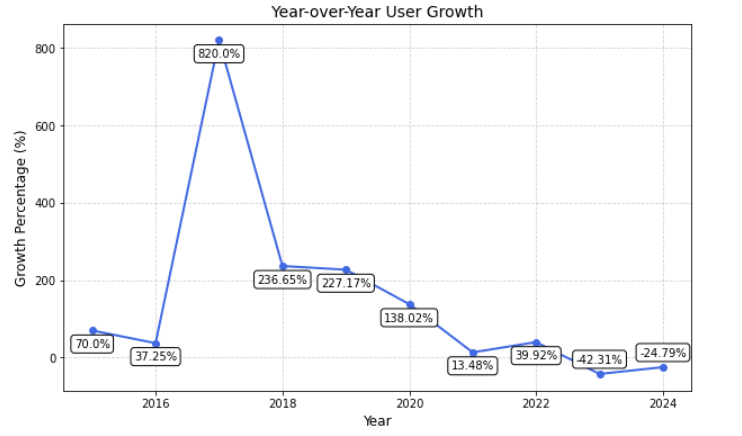

#### Request for Action:

To better understand the root cause of the growth slowdown and develop actionable strategies, I’d like to collaborate with:

- Product & Engineering: To address data inconsistencies (e.g., duplicate receipts, missing values, and standardizing product metadata).
- Marketing & Partnerships: To explore re-engagement strategies for existing users and targeted acquisition campaigns through high-growth merchant partnerships, especially Walmart. We can start by assessing our top-performing states with large populations, such as Texas, Florida, and California, to maximize impact.
- Analytics & Strategy Team: To dive deeper into user churn drivers—is it due to experience, monetization challenges, or competition/alternatives? 

I would like to set up a quick sync to discuss these insights and align on next steps. Let me know your availability! Thank you!

Best,
Sathwik

##########################################################################################################################

### Thank you for the opportunity!

## END!